## Holiday Package Prediction
### 1) Problem Statement
"Trips & Travel.Com" aims to expand its customer base through a sustainable business model.

The company currently offers five package types: Basic, Standard, Deluxe, Super Deluxe, and King.

Data from the past year shows that 18% of customers purchased these packages.

High marketing costs were incurred due to random customer contact without using available data.

The company plans to launch a new product: the Wellness Tourism Package.

Wellness Tourism involves travel that maintains, enhances, or starts a healthy lifestyle, promoting well-being.

The company wants to use existing and potential customer data to make marketing more efficient.

### 2) Data Collection
The dataset is sourced from Kaggle.https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction 

The data includes 20 columns and 4888 rows.

In [1]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
import missingno as msno

<Axes: >

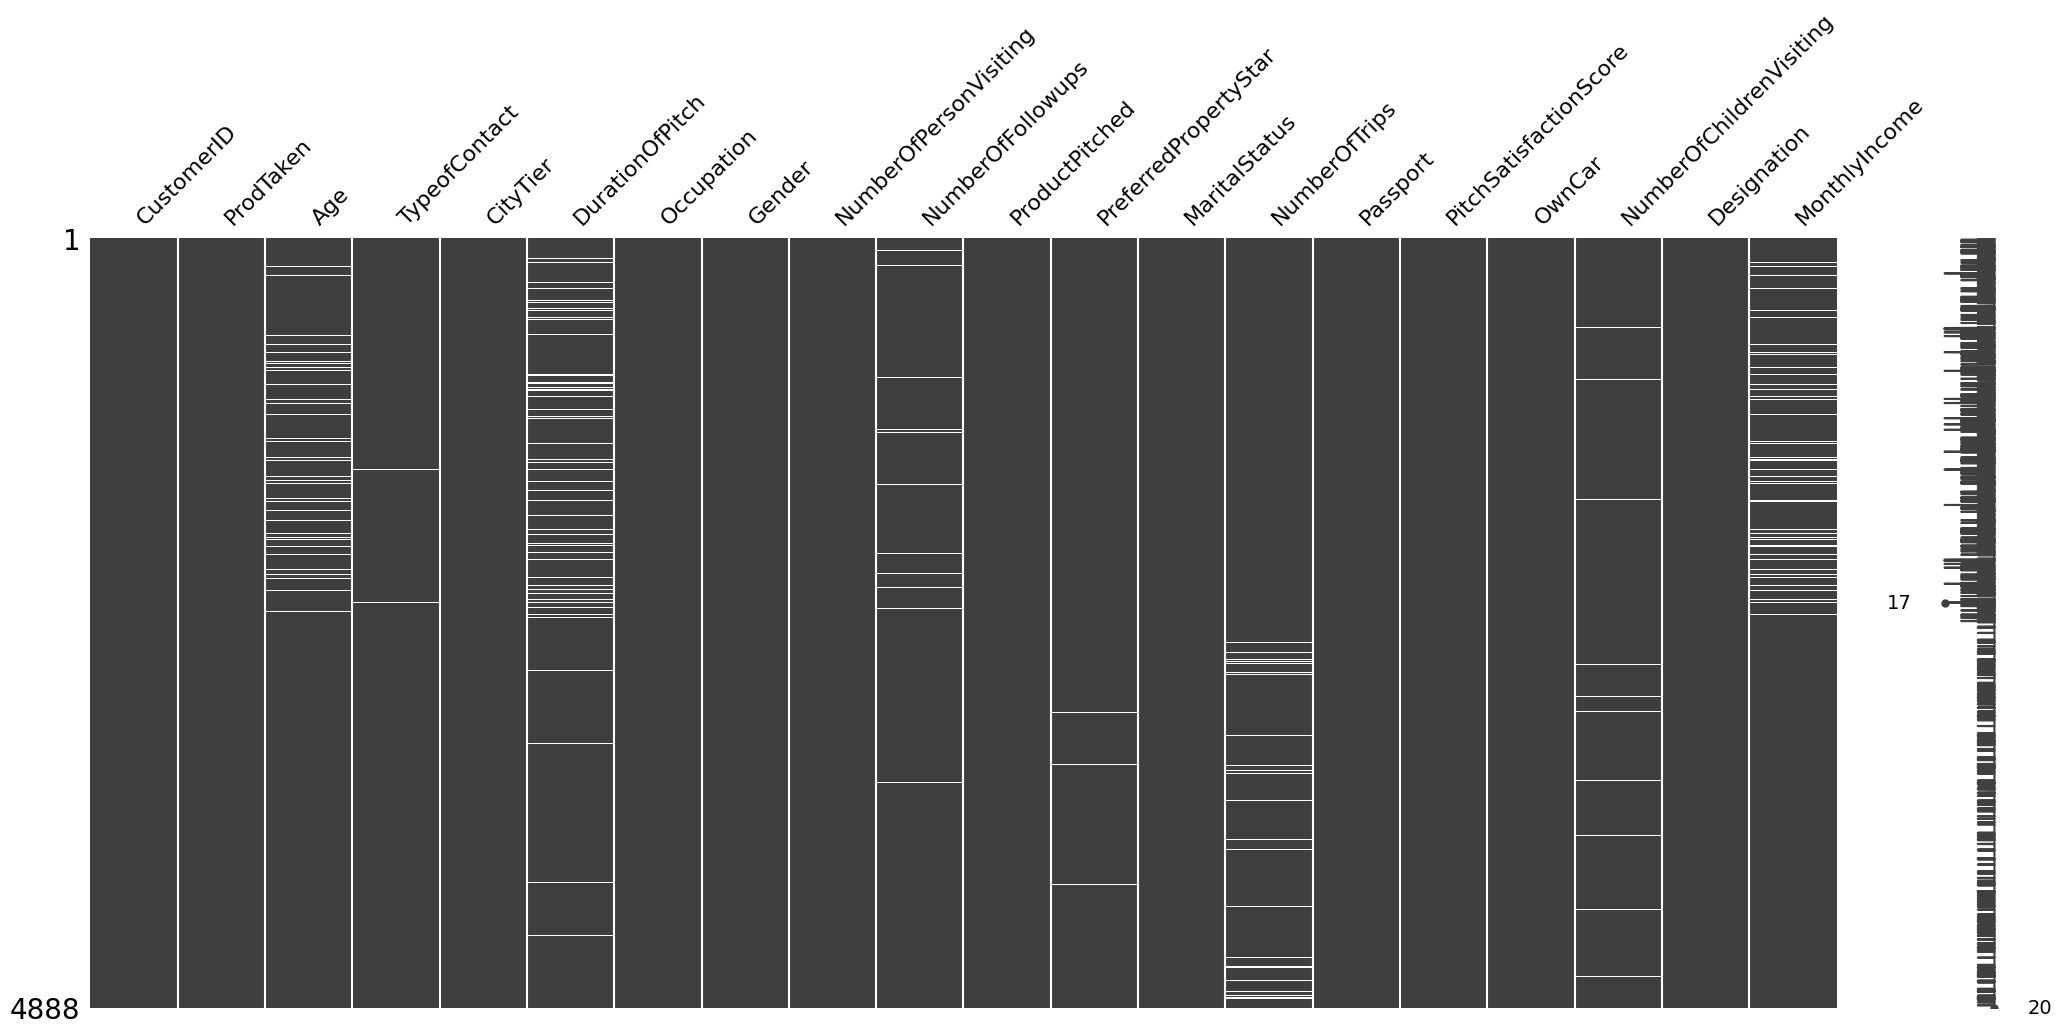

In [5]:
msno.matrix(df)

<Axes: >

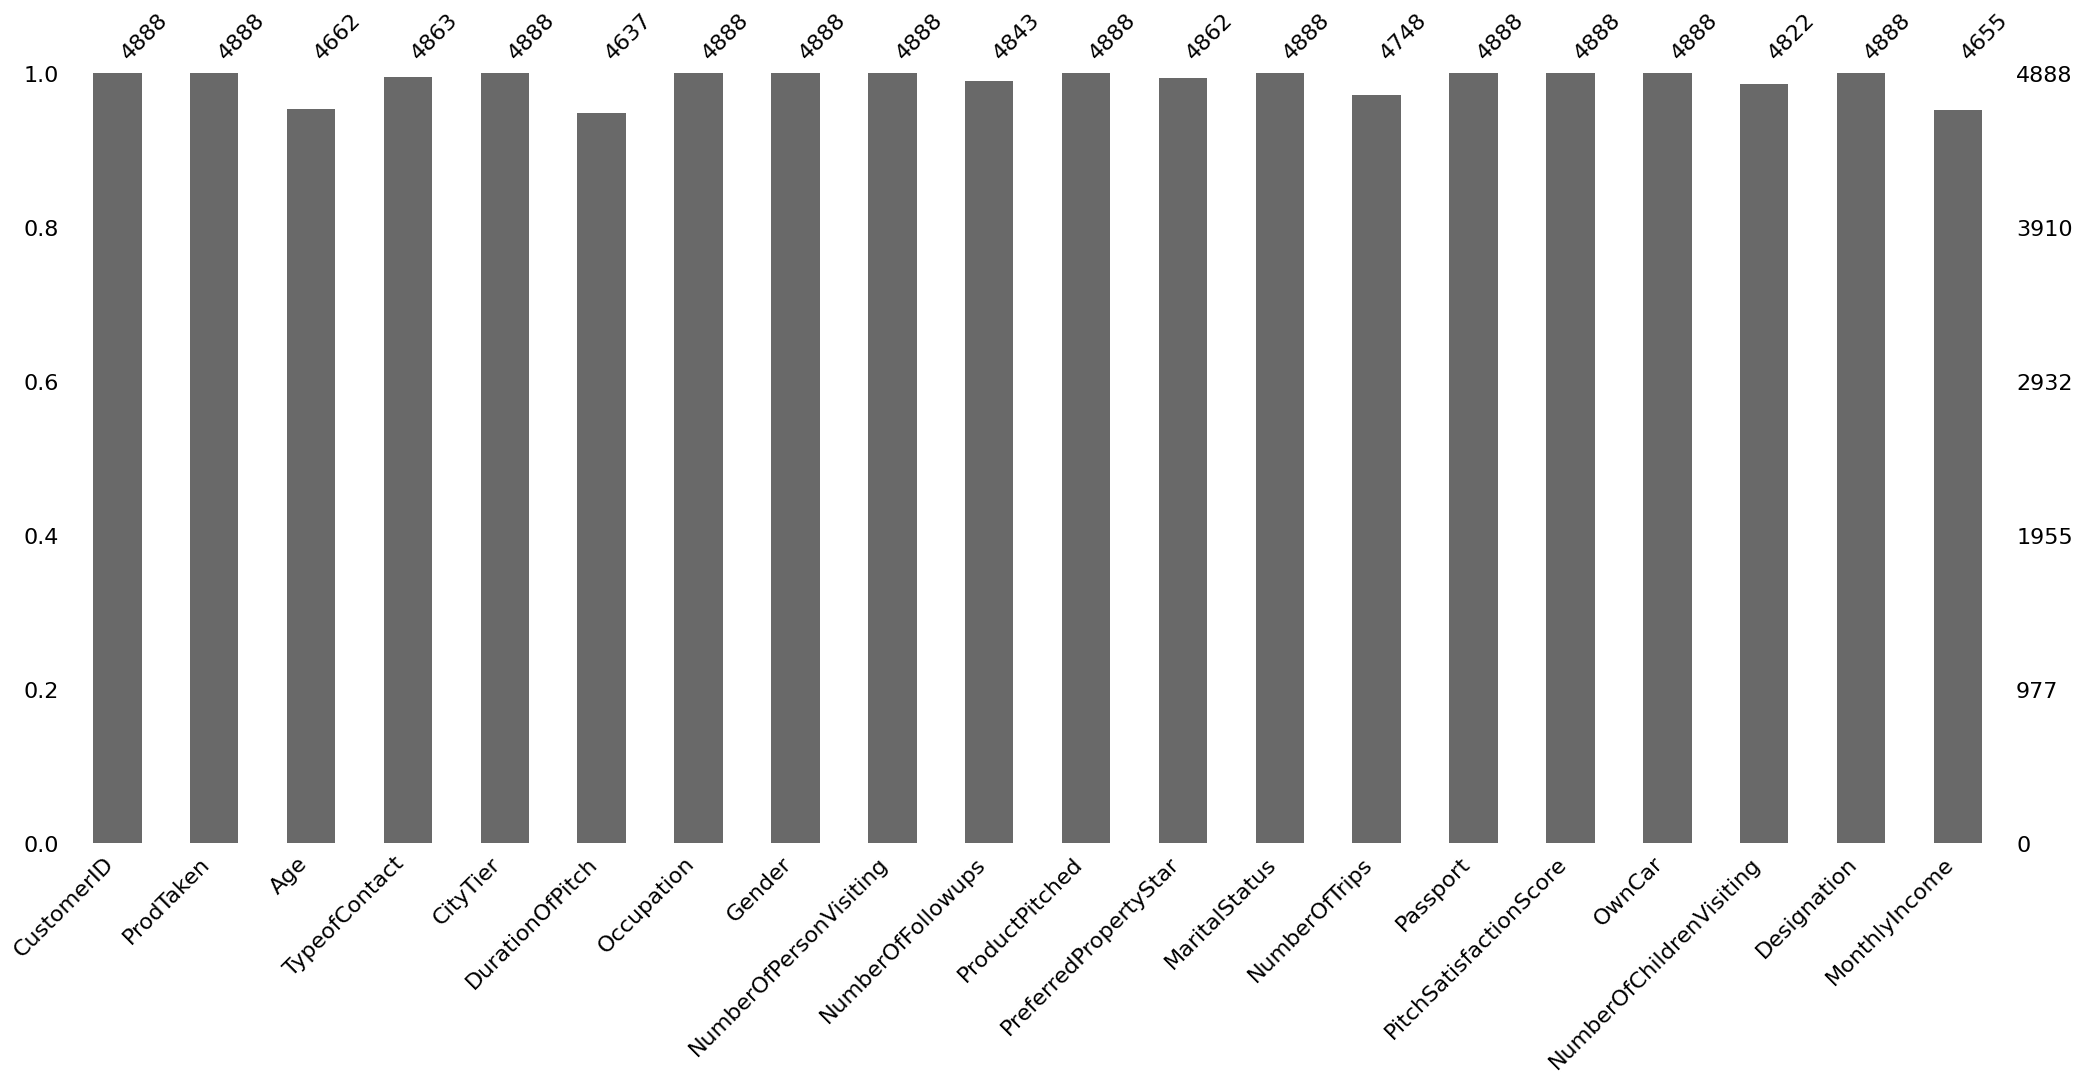

In [6]:
msno.bar(df)

In [7]:
# Check all the categories 
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

#### Replacing Spelling errors (gaps) in case of Female and merging Single and Unmarried as they both mean the same

In [10]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [11]:
### Check all the categories 
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [12]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer for median and mode
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# List of columns to be imputed with median
median_columns = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

# List of columns to be imputed with mode
mode_columns = ['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisiting']

# Apply median imputer
df[median_columns] = median_imputer.fit_transform(df[median_columns])

# Apply mode imputer
df[mode_columns] = mode_imputer.fit_transform(df[mode_columns])


<Axes: >

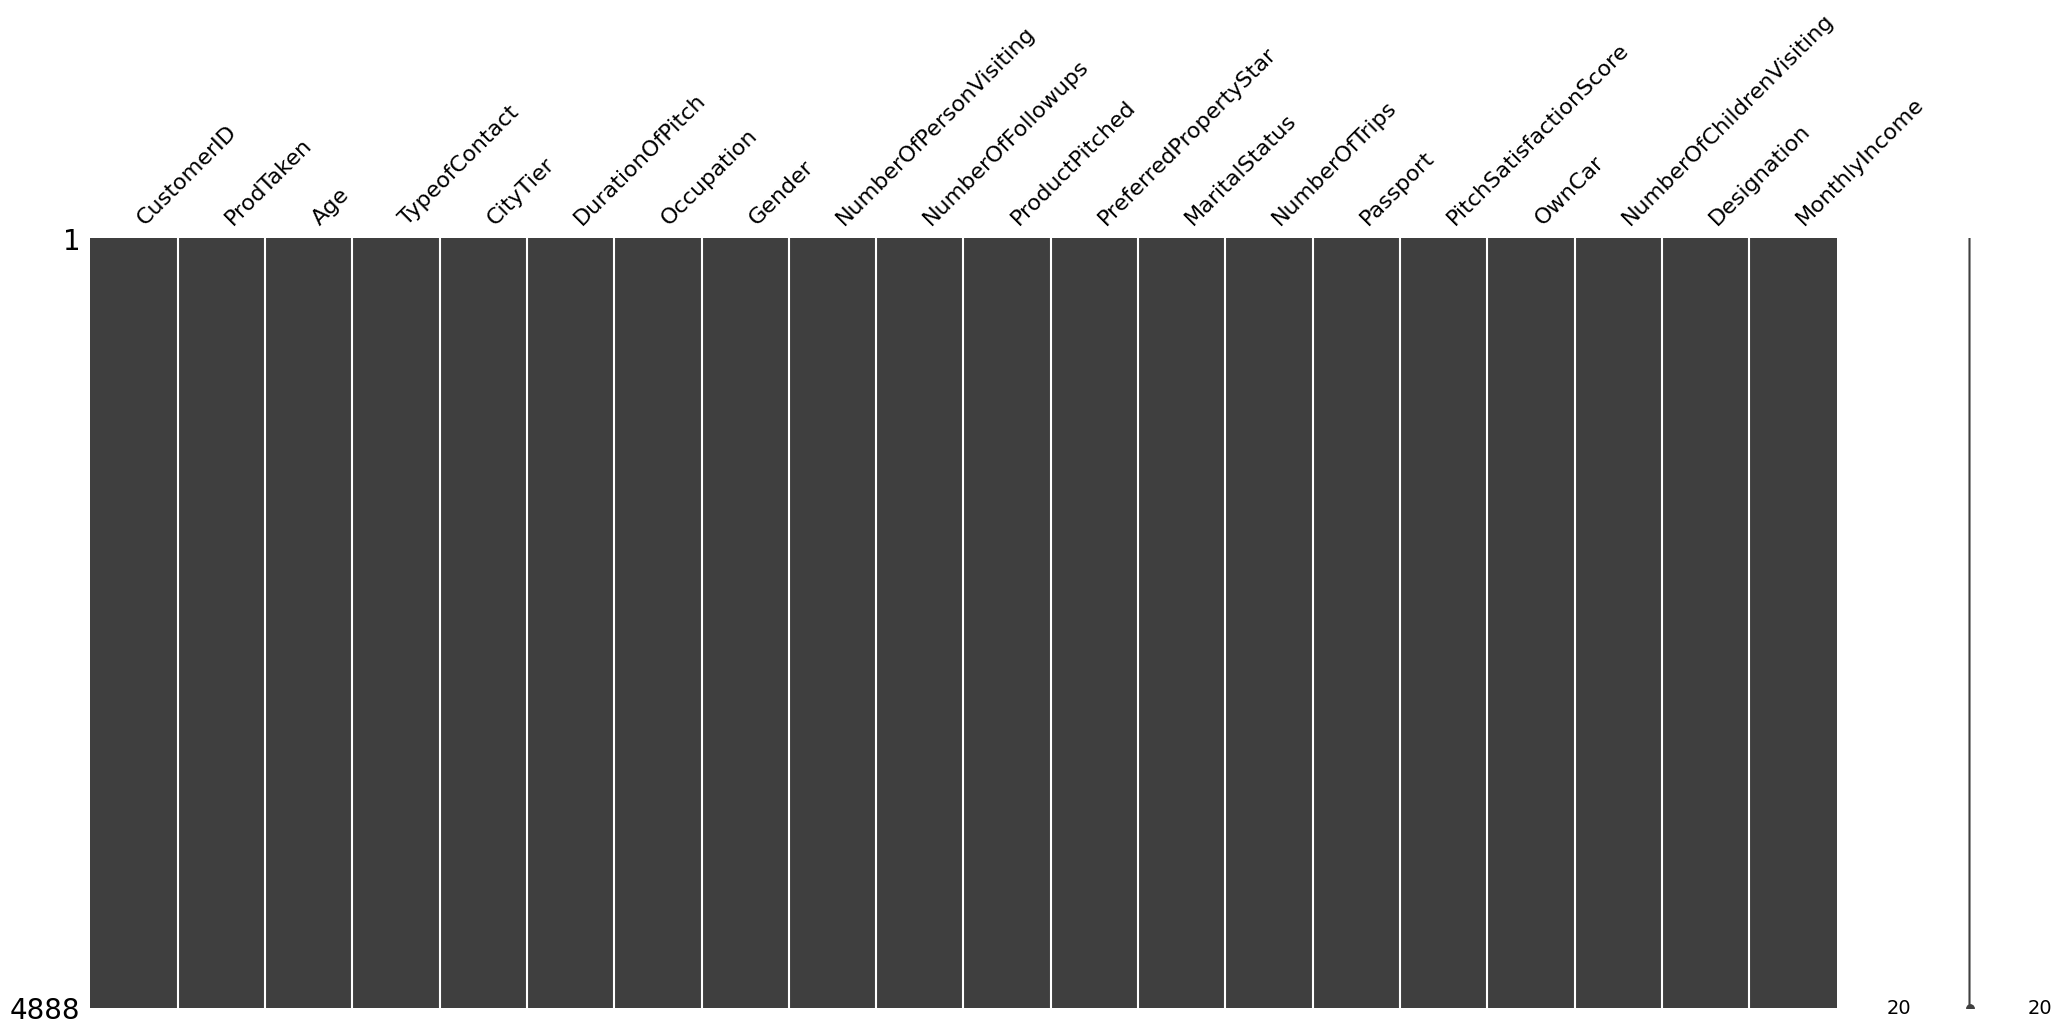

In [14]:
msno.matrix(df)

In [15]:
print(df.isnull().sum().sum())

0


In [16]:
df.drop('CustomerID', inplace=True, axis=1)

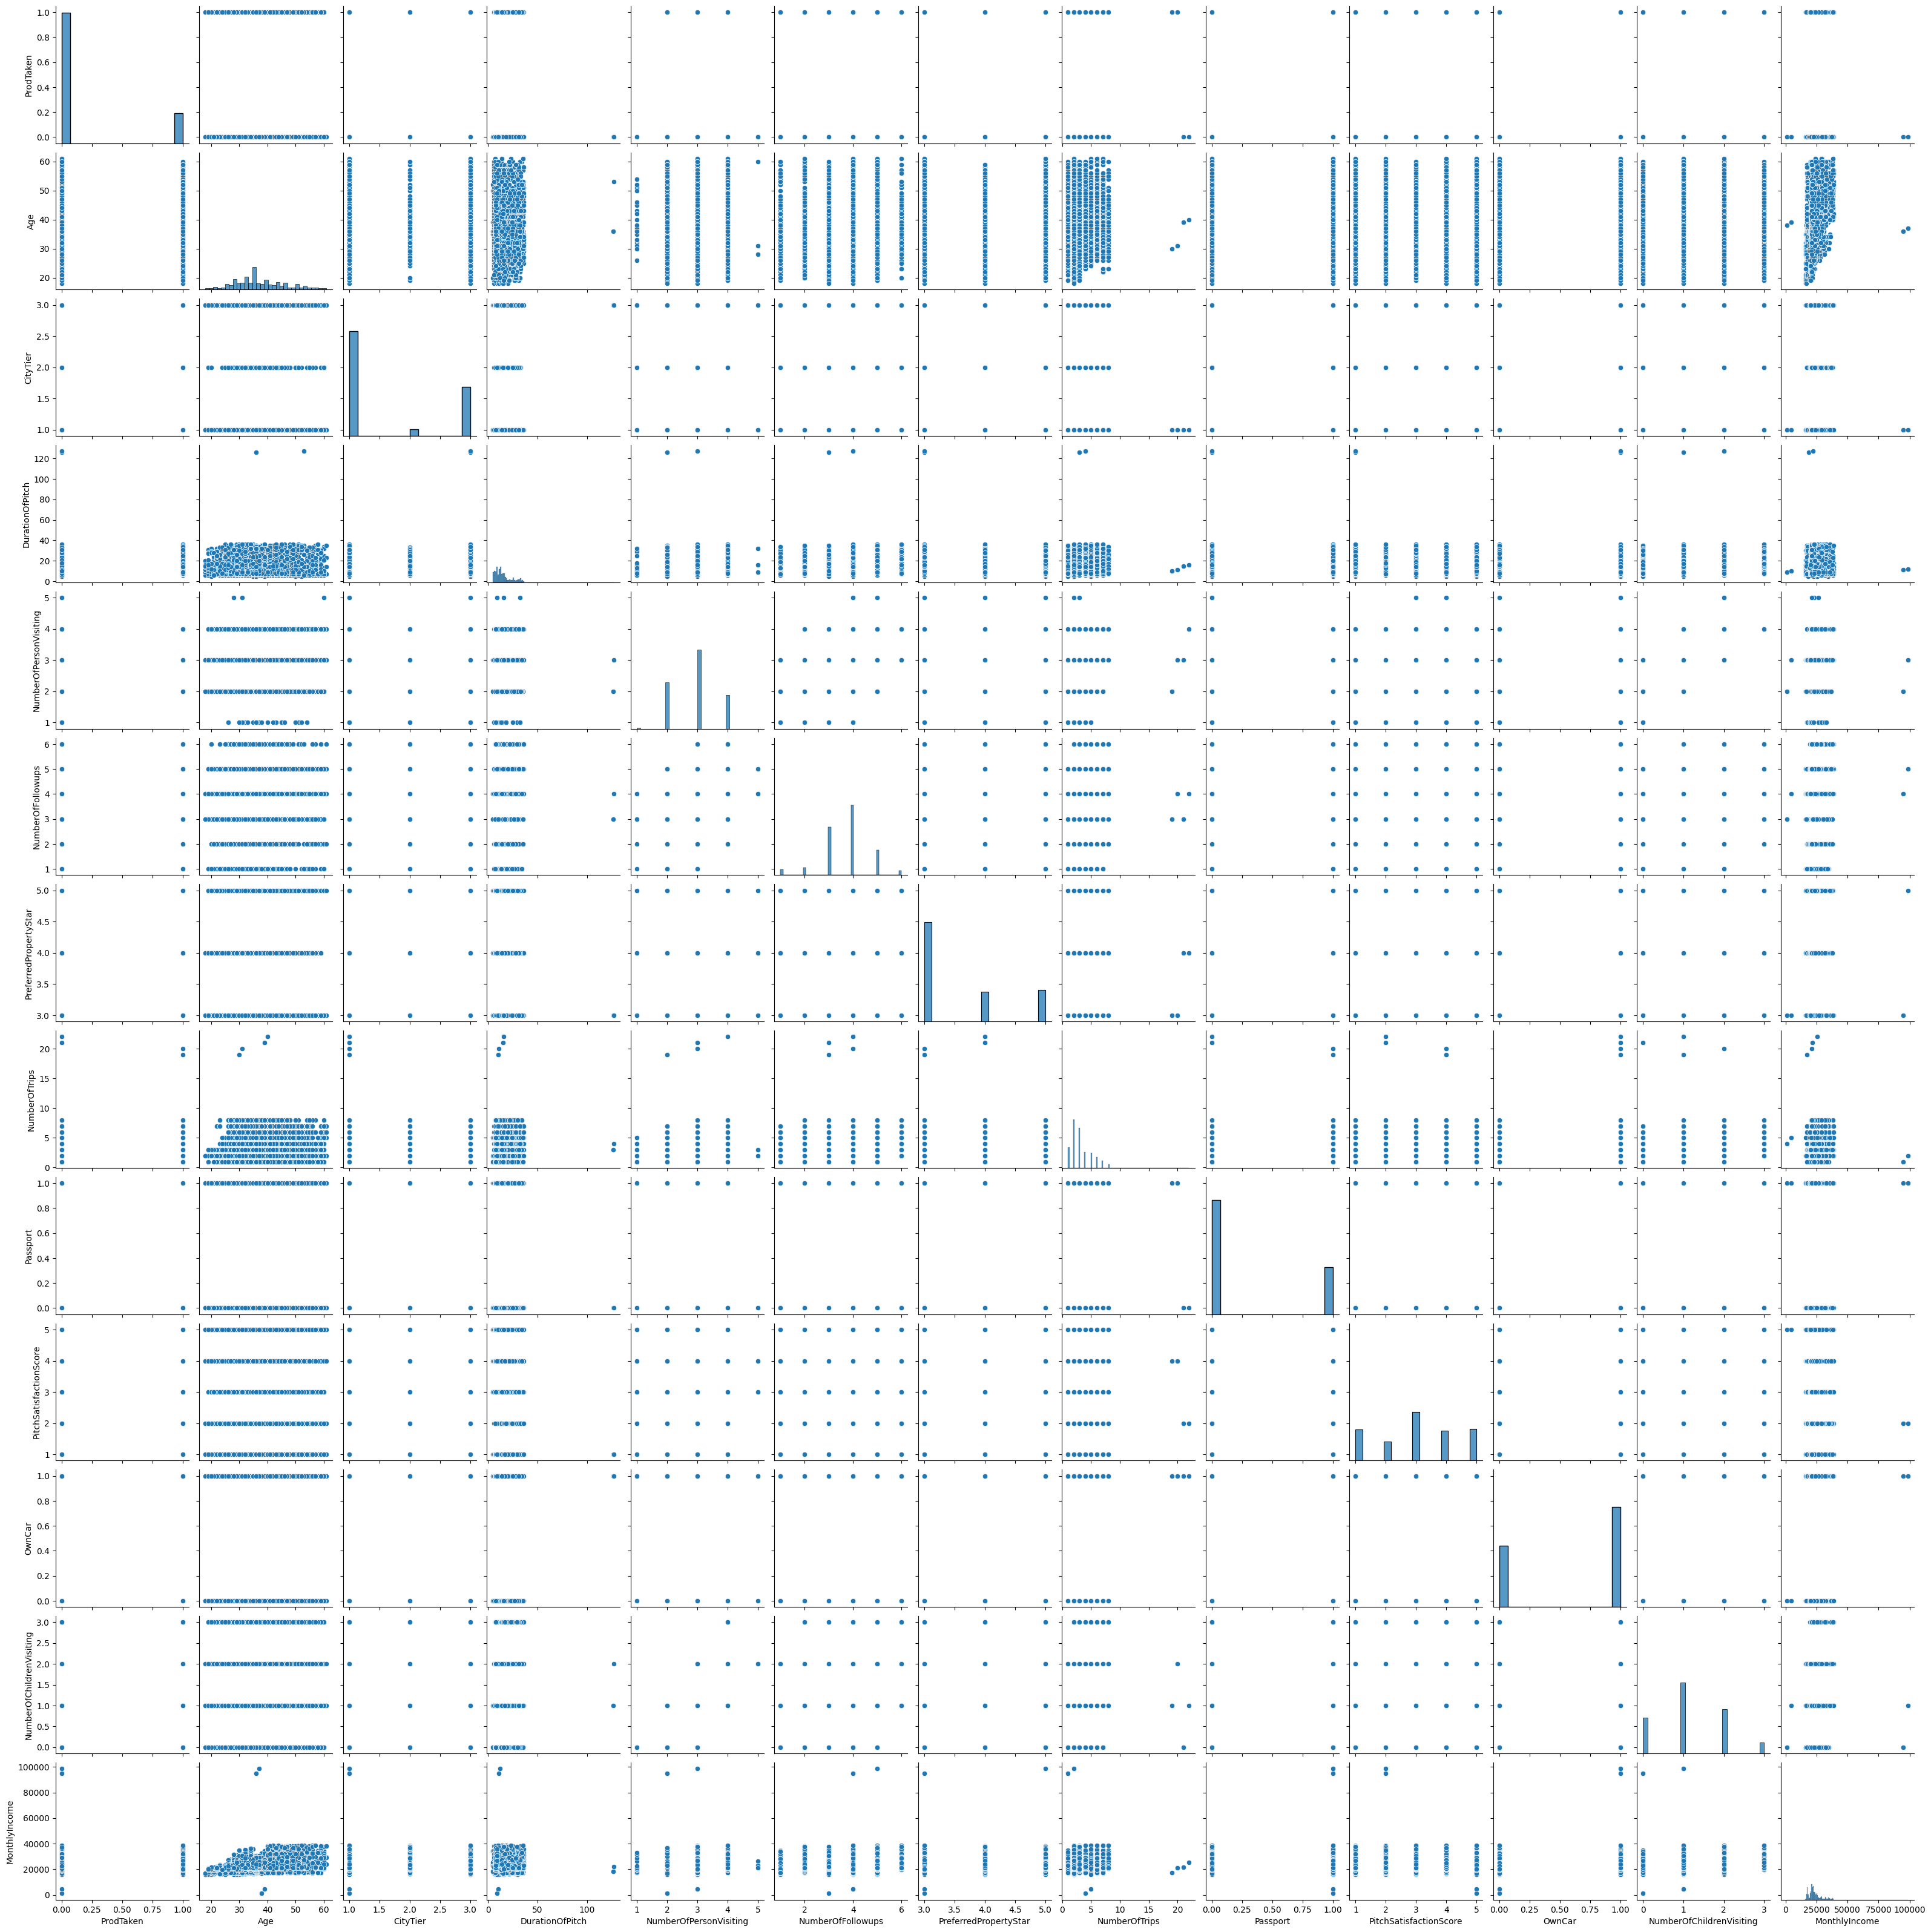

In [17]:
sns.pairplot(df)

## Feature Engineering

### Feature Extraction

In [18]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### create new column ["TotalVisiting"] for features ['NumberOfPersonVisiting','NumberOfChildrenVisiting'] as both have similar meaning

In [19]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [20]:
from sklearn.preprocessing import *
# Identify categorical and numerical features
cat_features = df.select_dtypes(include="object").columns
num_features = df.select_dtypes(exclude="object").columns

# Apply Label Encoding to categorical features

for col in cat_features:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   int64  
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   int64  
 6   Gender                  4888 non-null   int64  
 7   NumberOfFollowups       4888 non-null   int64  
 8   ProductPitched          4888 non-null   int64  
 9   PreferredPropertyStar   4888 non-null   int64  
 10  MaritalStatus           4888 non-null   int64  
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

## Train Test Split And Model Training

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [22]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,1,3,6.0,2,0,2,1,0,2,1.0,1,2,1,2,20993.0,2
1,49.0,0,1,14.0,2,1,3,1,1,0,2.0,0,3,1,2,20130.0,4
2,37.0,1,1,8.0,0,1,3,0,0,2,7.0,1,3,0,1,17090.0,2
3,33.0,0,1,9.0,2,0,2,0,0,0,2.0,1,5,1,1,17909.0,2
4,36.0,1,1,8.0,3,1,2,0,1,0,1.0,0,5,1,1,18468.0,1


In [23]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [24]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,1,3,6.0,2,0,2,1,0,2,1.0,1,2,1,2,20993.0,2
1,49.0,0,1,14.0,2,1,3,1,1,0,2.0,0,3,1,2,20130.0,4
2,37.0,1,1,8.0,0,1,3,0,0,2,7.0,1,3,0,1,17090.0,2
3,33.0,0,1,9.0,2,0,2,0,0,0,2.0,1,5,1,1,17909.0,2
4,36.0,1,1,8.0,3,1,2,0,1,0,1.0,0,5,1,1,18468.0,1


[]

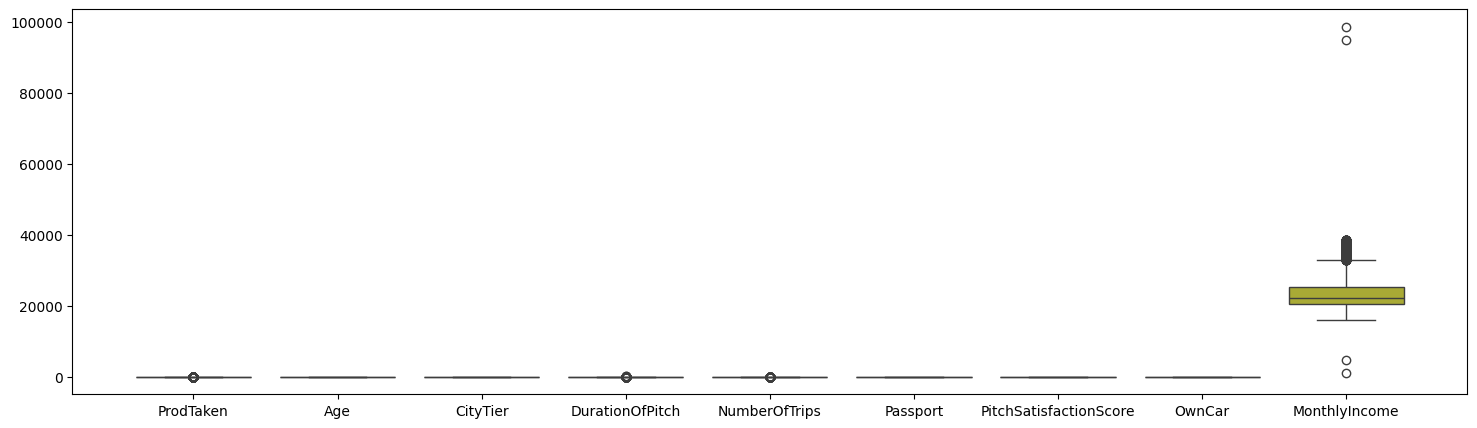

In [25]:
plt.figure(figsize=(18, 5))
sns.boxplot(df[num_features])
plt.plot()

In [26]:
# Scale numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

print(X)

       Age  TypeofContact  CityTier  DurationOfPitch  Occupation  Gender  \
0     41.0              1         3              6.0           2       0   
1     49.0              0         1             14.0           2       1   
2     37.0              1         1              8.0           0       1   
3     33.0              0         1              9.0           2       0   
4     36.0              1         1              8.0           3       1   
...    ...            ...       ...              ...         ...     ...   
4883  49.0              1         3              9.0           3       1   
4884  28.0              0         1             31.0           2       1   
4885  52.0              1         3             17.0           2       0   
4886  19.0              1         3             16.0           3       1   
4887  36.0              1         1             14.0           2       1   

      NumberOfFollowups  ProductPitched  PreferredPropertyStar  MaritalStatus  \
0     

In [27]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   int64  
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   int64  
 5   Gender                  4888 non-null   int64  
 6   NumberOfFollowups       4888 non-null   int64  
 7   ProductPitched          4888 non-null   int64  
 8   PreferredPropertyStar   4888 non-null   int64  
 9   MaritalStatus           4888 non-null   int64  
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [29]:
pd.DataFrame(X_train)

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
3995,36.0,1,1,7.0,3,1,4,0,0,2,3.0,0,4,1,1,21537.0,2
2610,42.0,1,1,21.0,2,1,3,0,0,1,6.0,0,4,1,1,21129.0,4
3083,50.0,1,1,7.0,1,0,3,0,2,0,4.0,0,4,1,1,22258.0,3
3973,38.0,1,1,7.0,2,1,4,1,0,1,3.0,0,5,0,2,24671.0,3
4044,44.0,0,1,35.0,3,0,1,0,0,2,6.0,0,3,0,1,23417.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,28.0,1,1,10.0,3,1,4,0,0,2,2.0,0,1,1,1,20723.0,4
466,41.0,1,3,8.0,2,0,2,4,2,0,1.0,0,5,1,0,31595.0,3
3092,38.0,0,3,28.0,3,0,3,0,0,0,7.0,0,2,1,1,21651.0,4
3772,28.0,1,3,30.0,3,0,4,1,0,1,3.0,0,1,1,2,22218.0,4


In [30]:
y_train

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3910, dtype: int64

## Classification Models:

In [31]:
from sklearn.preprocessing import *
from sklearn.feature_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.impute import *
from sklearn.svm import *
from sklearn.neural_network import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *

Logisitic Regression
Model performance :
- Accuracy: 0.8395
- F1 score: 0.8055
- Precision: 0.7656
- Recall: 0.2565
- Roc Auc Score: 0.6187
[[772  15]
 [142  49]]
-----------------------------------


Decision Tree
Model performance :
- Accuracy: 0.9233
- F1 score: 0.9224
- Precision: 0.8222
- Recall: 0.7749
- Roc Auc Score: 0.8671
[[755  32]
 [ 43 148]]
-----------------------------------


Random Forest
Model performance :
- Accuracy: 0.9346
- F1 score: 0.9303
- Precision: 0.9635
- Recall: 0.6911
- Roc Auc Score: 0.8424
[[782   5]
 [ 59 132]]
-----------------------------------


Gradient Boost
Model performance :
- Accuracy: 0.8589
- F1 score: 0.8387
- Precision: 0.7849
- Recall: 0.3822
- Roc Auc Score: 0.6784
[[767  20]
 [118  73]]
-----------------------------------


Adaboost
Model performance :
- Accuracy: 0.8395
- F1 score: 0.8028
- Precision: 0.7931
- Recall: 0.2408
- Roc Auc Score: 0.6128
[[775  12]
 [145  46]]
-----------------------------------


SVM
Model performance :
- A

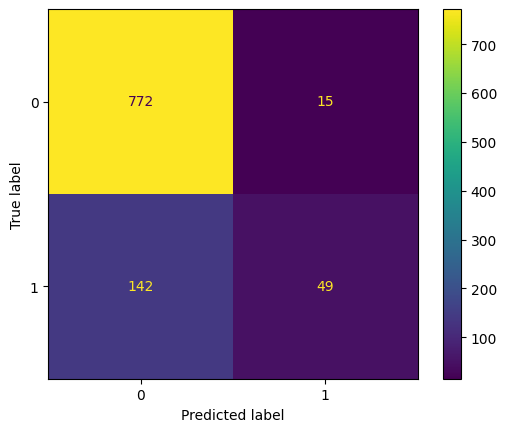

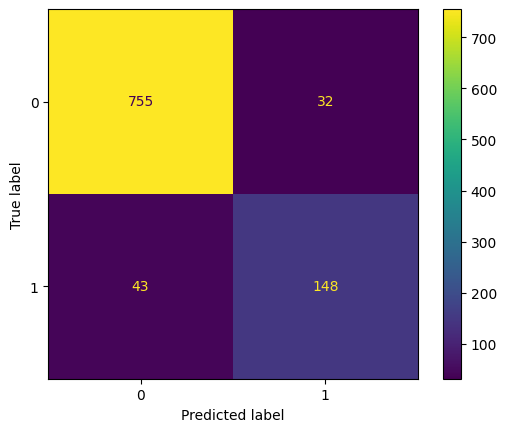

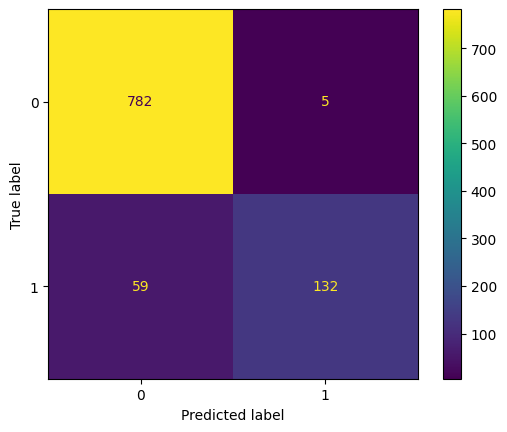

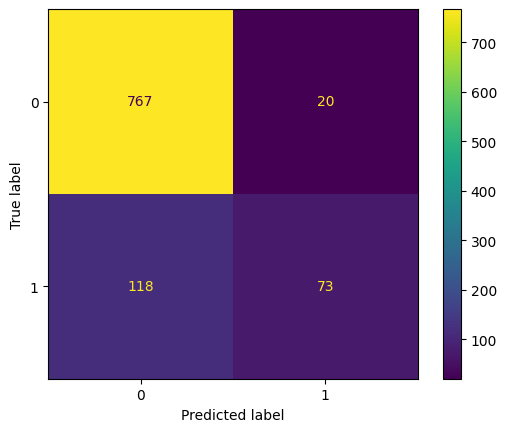

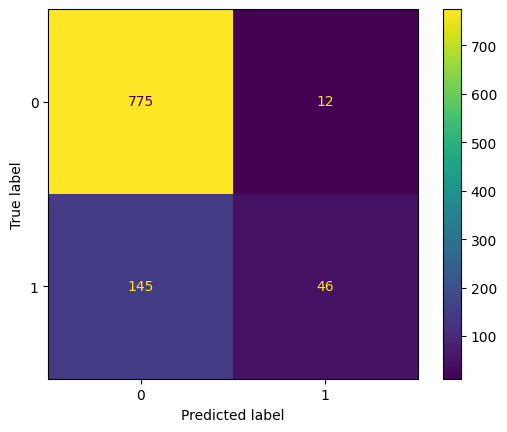

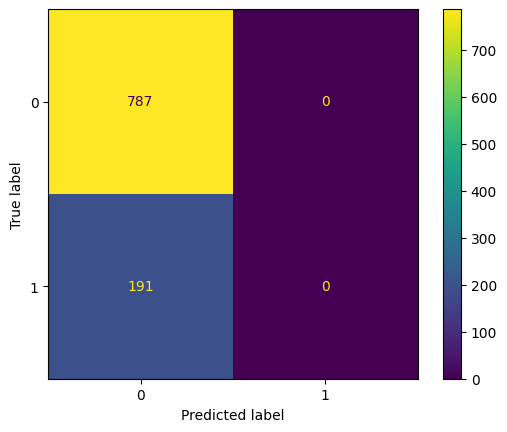

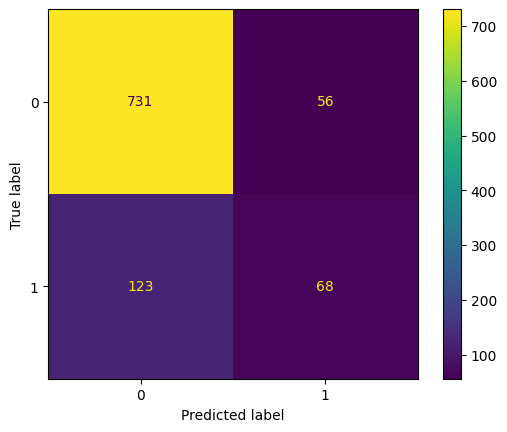

In [32]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "SVM" :SVC(),
    "Naives Bayes" :GaussianNB()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred) 
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    cm=confusion_matrix(y_test, y_test_pred)
    cmat=ConfusionMatrixDisplay(cm,display_labels=np.unique(y).tolist())



    print(list(models.keys())[i])
    
    print('Model performance :')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    print(cm)
    print(cmat.plot())
    


    
    print('-'*35)
    print('\n')

## Feature selection using SelectKBest

In [33]:
skb=SelectKBest(chi2,k=5)
skb

SelectKBest(k=5, score_func=<function chi2 at 0x000002202E37A660>)

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   int64  
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   int64  
 5   Gender                  4888 non-null   int64  
 6   NumberOfFollowups       4888 non-null   int64  
 7   ProductPitched          4888 non-null   int64  
 8   PreferredPropertyStar   4888 non-null   int64  
 9   MaritalStatus           4888 non-null   int64  
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [35]:
skb.fit(X,y)

SelectKBest(k=5, score_func=<function chi2 at 0x000002202E37A660>)

In [36]:
best_features=skb.get_feature_names_out()

In [37]:
best_features

array(['Age', 'DurationOfPitch', 'ProductPitched', 'Passport',
       'MonthlyIncome'], dtype=object)

In [38]:
X_select=df[['Age', 'DurationOfPitch', 'ProductPitched', 'Passport',
       'MonthlyIncome']]

In [39]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_select,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 5), (978, 5))

Logisitic Regression
Model performance :
- Accuracy: 0.8190
- F1 score: 0.7641
- Precision: 0.7059
- Recall: 0.1257
- Roc Auc Score: 0.5565
[[777  10]
 [167  24]]
-----------------------------------


Decision Tree
Model performance :
- Accuracy: 0.8937
- F1 score: 0.8919
- Precision: 0.7486
- Recall: 0.6859
- Roc Auc Score: 0.8150
[[743  44]
 [ 60 131]]
-----------------------------------


Random Forest
Model performance :
- Accuracy: 0.9131
- F1 score: 0.9085
- Precision: 0.8630
- Recall: 0.6597
- Roc Auc Score: 0.8171
[[767  20]
 [ 65 126]]
-----------------------------------


Gradient Boost
Model performance :
- Accuracy: 0.8487
- F1 score: 0.8257
- Precision: 0.7416
- Recall: 0.3455
- Roc Auc Score: 0.6582
[[764  23]
 [125  66]]
-----------------------------------


Adaboost
Model performance :
- Accuracy: 0.8252
- F1 score: 0.7843
- Precision: 0.6786
- Recall: 0.1990
- Roc Auc Score: 0.5880
[[769  18]
 [153  38]]
-----------------------------------


SVM
Model performance :
- A

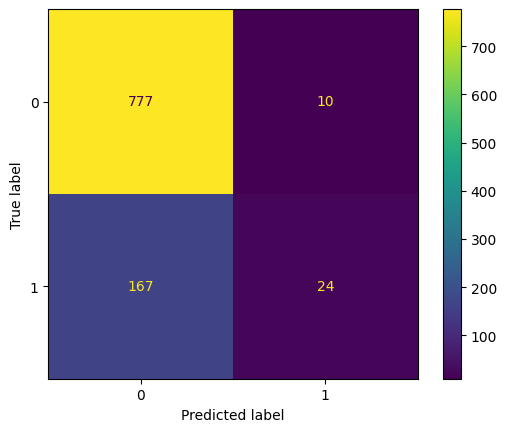

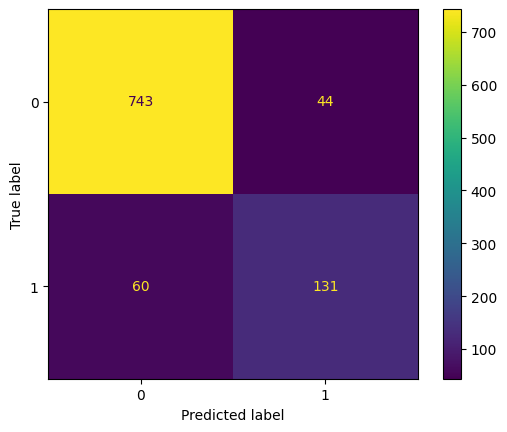

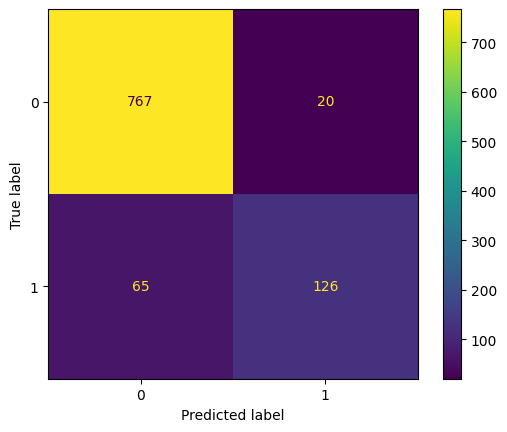

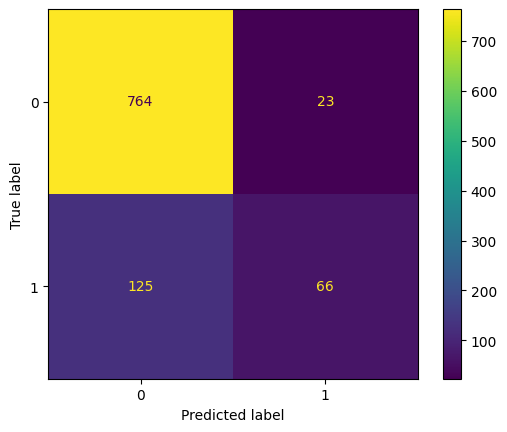

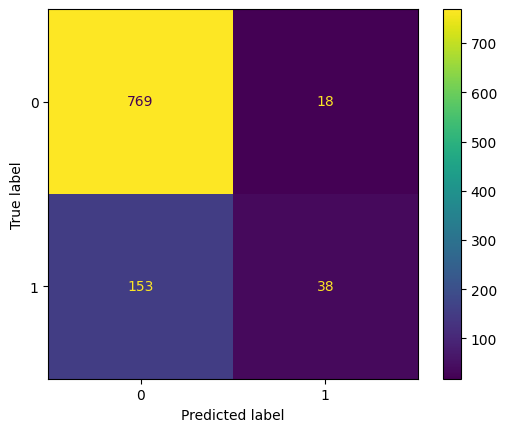

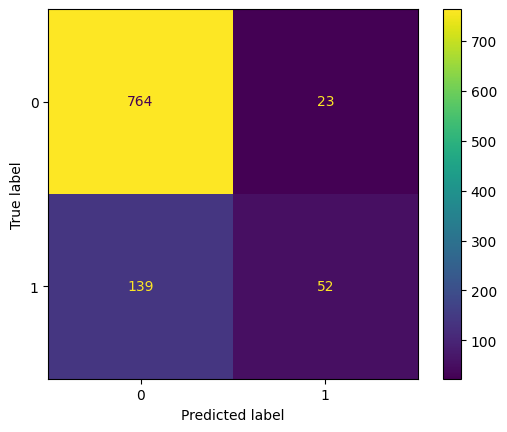

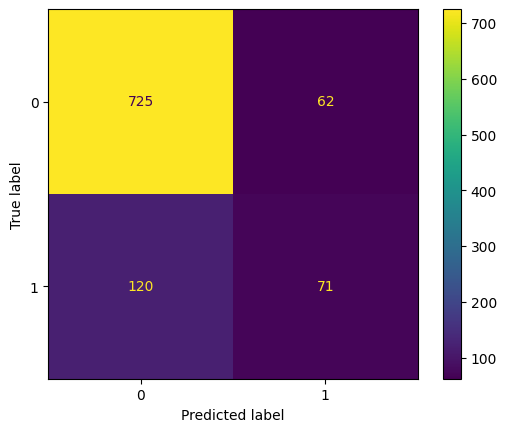

In [40]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "SVM" :SVC(),
    "Naives Bayes" :GaussianNB()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred) 
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    cm=confusion_matrix(y_test, y_test_pred)
    cmat=ConfusionMatrixDisplay(cm,display_labels=np.unique(y).tolist())



    print(list(models.keys())[i])
    
    print('Model performance :')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    print(cm)
    print(cmat.plot())
    


    
    print('-'*35)
    print('\n')

## Dimensionality reduction

In [41]:
X = df.drop(['ProdTaken'], axis=1)
Y = df['ProdTaken']
from sklearn.decomposition import PCA
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
pca=PCA()
pca.fit(X_scaled)
#calculate the explained variance ratio and its cumulative sum
cumulative_variance=pca.explained_variance_ratio_.cumsum()
n_components=(cumulative_variance>=0.95).argmax()+1
n_components,cumulative_variance

(np.int64(15),
 array([0.14084923, 0.22627693, 0.29743937, 0.36155016, 0.42392868,
        0.48559746, 0.54671649, 0.60397252, 0.65917691, 0.71415741,
        0.76807502, 0.82030906, 0.87089277, 0.91505183, 0.95314584,
        0.98511271, 1.        ]))

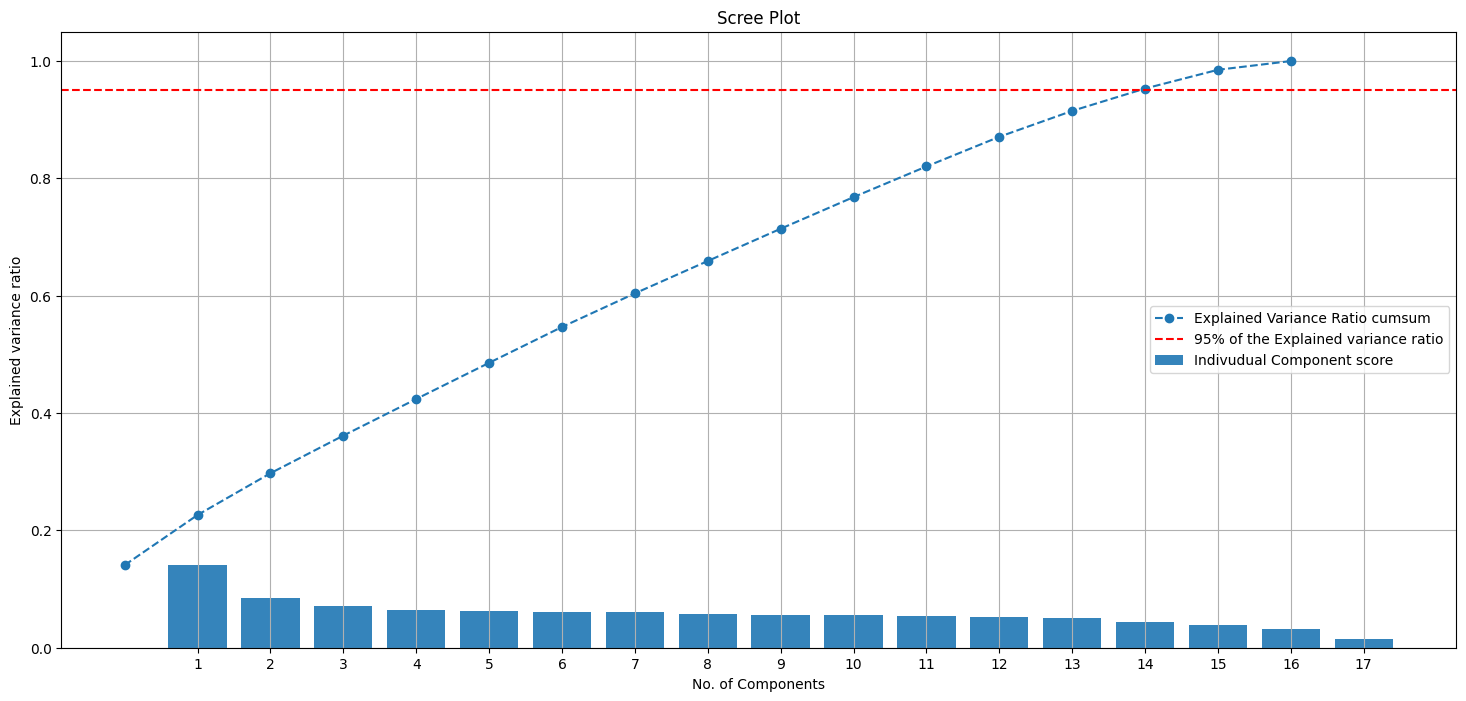

In [42]:
import matplotlib.pyplot as plt
explained_variance_ratio_cancer=pca.explained_variance_ratio_
plt.figure(figsize=(18,8))
plt.plot(np.cumsum(explained_variance_ratio_cancer),marker='o',
         linestyle='--',label='Explained Variance Ratio cumsum')
plt.bar(range(1,len(explained_variance_ratio_cancer)+1),
        explained_variance_ratio_cancer,
        alpha=0.9,label='Indivudual Component score')
plt.title('Scree Plot')
plt.xlabel('No. of Components')
plt.ylabel('Explained variance ratio')
plt.axhline(y=0.95,color='r',linestyle='--',
            label='95% of the Explained variance ratio')
plt.xticks(range(1,len(explained_variance_ratio_cancer)+1))
plt.legend()
plt.grid()
plt.show()

In [43]:
pca=PCA(n_components=14)
pca.fit(X_scaled)
prop_var=pca.explained_variance_ratio_
n_components=np.arange(pca.n_components_)+1

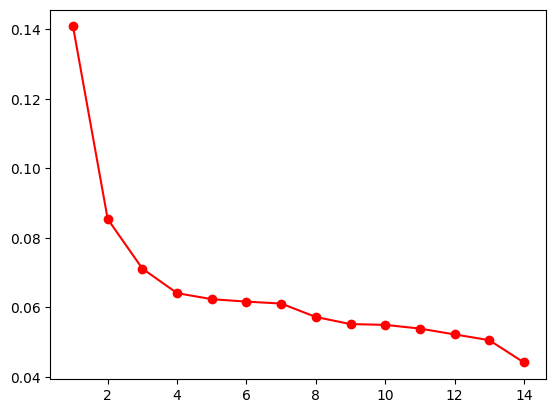

In [44]:
plt.plot(n_components,prop_var,'ro-')
plt.show()

In [45]:
pca_final=PCA(n_components=2)
pca_components=pca_final.fit_transform(X)

In [46]:
loading=pca_final.components_
feature_names=X.columns
pc1_loading=pd.Series(loading[0],index=feature_names)
pc1_loading_sort=pc1_loading.abs().sort_values(ascending=False)
print('PC1',pc1_loading_sort)
pc2_loading=pd.Series(loading[1],index=feature_names)
pc2_loading_sort=pc2_loading.abs().sort_values(ascending=False)
print('PC2',pc2_loading_sort)

PC1 ProductPitched            0.633951
MonthlyIncome             0.510018
Age                       0.363093
TotalVisiting             0.284064
Designation               0.263181
NumberOfTrips             0.141945
NumberOfFollowups         0.139121
CityTier                  0.088863
OwnCar                    0.070827
MaritalStatus             0.046578
DurationOfPitch           0.024472
PitchSatisfactionScore    0.021392
Occupation                0.017221
Gender                    0.014697
PreferredPropertyStar     0.004555
TypeofContact             0.003492
Passport                  0.002690
dtype: float64
PC2 TotalVisiting             0.845378
NumberOfFollowups         0.328241
ProductPitched            0.321216
NumberOfTrips             0.180605
Age                       0.140901
Designation               0.109035
DurationOfPitch           0.057299
CityTier                  0.054511
MonthlyIncome             0.043585
Passport                  0.024686
PitchSatisfactionScore    0.0204

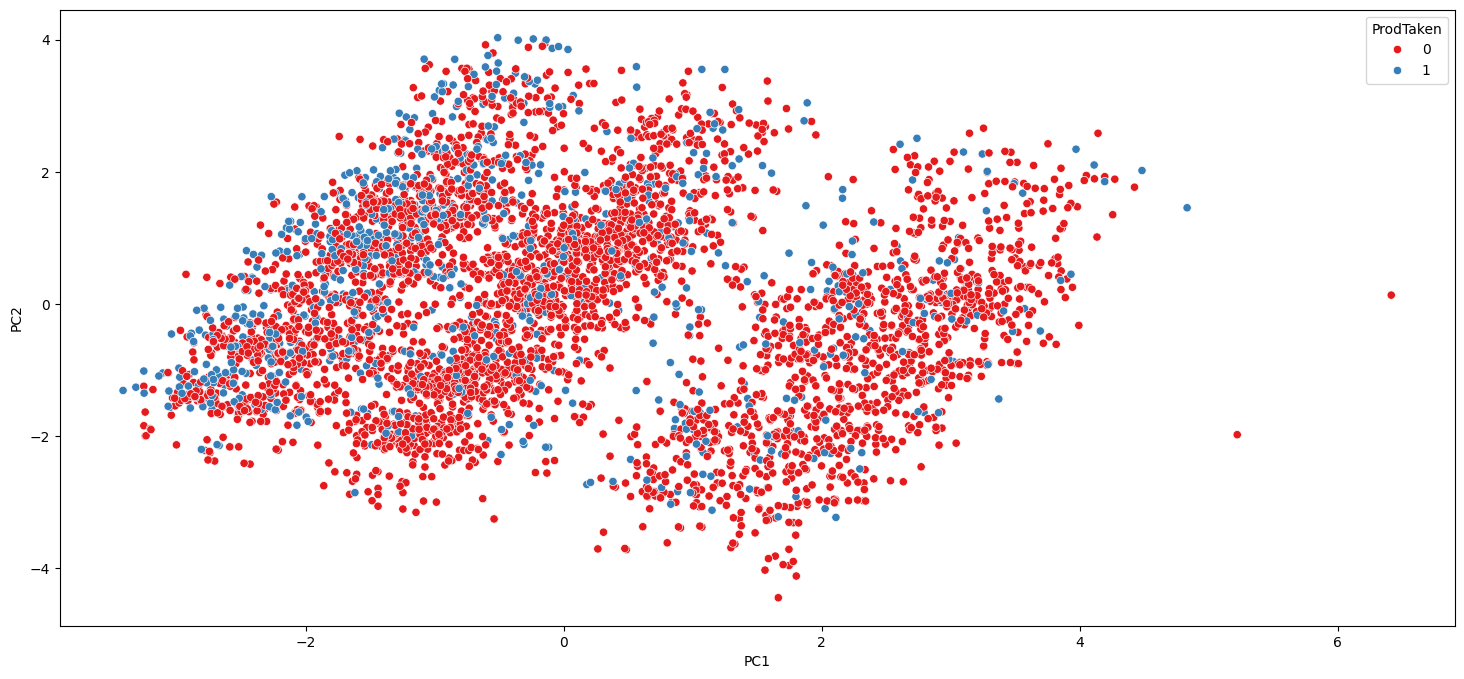

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,8))
data_final=pd.DataFrame(data=pca_components,columns=['PC1','PC2'])
finaldf=pd.concat([data_final,y],axis=1)
finaldf
sns.scatterplot(x=finaldf['PC1'],y=finaldf['PC2'],hue=finaldf['ProdTaken'],
                palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [48]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PC1        4888 non-null   float64
 1   PC2        4888 non-null   float64
 2   ProdTaken  4888 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 114.7 KB


## GLM:

In [49]:
# Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Adding a constant for the intercept
X = sm.add_constant(X)

# Create the GLM model
model = sm.GLM(y, X, family=sm.families.Binomial())

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              ProdTaken   No. Observations:                 4888
Model:                            GLM   Df Residuals:                     4870
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1917.0
Date:                Tue, 11 Feb 2025   Deviance:                       3834.1
Time:                        11:10:10   Pearson chi2:                 6.18e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1671
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

## Boosting

In [50]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define base models
base_models = [
    ('GRADIENTBOOST', GradientBoostingClassifier()),
    ('DECISIONTREE', DecisionTreeClassifier()),
    ('ADABOOST', AdaBoostClassifier()),
    ('SVC', SVC())
]

# Define meta model
meta_model = RandomForestClassifier()

# Create Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models,
                                    final_estimator=meta_model,
                                    cv=5, 
                                    stack_method='auto')

# Fit the model
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred_stack = stacking_model.predict(X_test)

# Print accuracy
print('Accuracy is:', accuracy_score(y_test, y_pred_stack))


Accuracy is: 0.8824130879345603


## MLP Classifier:

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report


In [52]:
mlp=MLPClassifier(hidden_layer_sizes=(128,64),activation='relu',
                  solver='adam',max_iter=300,random_state=42)
mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

Accuracy Score 0.83640081799591
Classification Report               precision    recall  f1-score   support

           0       0.85      0.97      0.90       787
           1       0.69      0.30      0.42       191

    accuracy                           0.84       978
   macro avg       0.77      0.63      0.66       978
weighted avg       0.82      0.84      0.81       978



## ANN

In [53]:
!pip install tensorflow

In [54]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD
from keras.regularizers import l1,l2

In [55]:
model=Sequential()
model.add(Dense(units=128,activation='relu',kernel_regularizer=l2(0.001),
               input_shape=(X_train.shape[1],)))
model.add(Dense(units=64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(units=3,activation='sigmoid')) #multiclass
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,219 (36.01 KB)

 Trainable params: 9,219 (36.01 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='accuracy',patience=10,verbose=0)
#monitor accuracy/loss/val_accuracy/val_loss
history=model.fit(X_train,y_train,epochs=20,batch_size=13,validation_split=0.2)


Epoch 1/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7718 - loss: 0.6708 - val_accuracy: 0.8159 - val_loss: 0.5100
Epoch 2/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8353 - loss: 0.4771 - val_accuracy: 0.8402 - val_loss: 0.4593
Epoch 3/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8404 - loss: 0.4520 - val_accuracy: 0.8338 - val_loss: 0.4535
Epoch 4/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - loss: 0.4447 - val_accuracy: 0.8389 - val_loss: 0.4440
Epoch 5/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8343 - loss: 0.4424 - val_accuracy: 0.8338 - val_loss: 0.4455
Epoch 6/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.4152 - val_accuracy: 0.8223 - val_loss: 0.4552
Epoch 7/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8212 - loss: 0.4530 - val_accuracy: 0.8389 - val_loss: 0.4352
Epoch 8/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8498 - loss: 0.4061 - val_accuracy: 0.

In [58]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(test_loss)
print(test_accuracy)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8394 - loss: 0.4054 
0.42733103036880493
0.8312883377075195


In [59]:
for layers in model.layers:
    print('name of the layer',layers.name)
    print('Weights of the layers',layers.get_weights())

name of the layer dense
Weights of the layers [array([[ 6.41052201e-02, -1.30443247e-02, -1.11869154e-02,
         4.97289747e-02, -8.63504559e-02, -1.00485370e-01,
         8.82938281e-02, -1.87367484e-01, -8.73689651e-02,
        -2.85767406e-01,  3.29065882e-02, -1.79913804e-01,
         1.42170325e-01,  1.42007917e-02, -5.94975613e-02,
        -2.26451993e-01,  2.18856912e-02,  4.54339926e-04,
         6.03402928e-02,  1.26354158e-01,  6.63543418e-02,
        -2.60056258e-04, -1.01832822e-01, -3.23287472e-02,
         6.90795481e-03,  4.30124849e-02,  1.83065623e-01,
        -2.92130932e-02, -2.07787044e-02,  5.19642681e-02,
         3.68343554e-02, -3.60513218e-02, -6.89920187e-02,
         2.59752870e-02, -9.15182158e-02, -4.99791279e-02,
         6.37600422e-02, -1.25335634e-01,  1.90152749e-01,
        -1.53017463e-02, -2.35814780e-01,  7.22878277e-02,
        -1.93577185e-02, -2.06727237e-01,  5.95643884e-03,
         8.36931355e-03, -3.01867235e-03,  6.60229921e-02,
         